In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("G:\\Netzwerk assignments\\argentina.csv")

In [3]:
data.head(10)

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.38324,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.34414,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.71414,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,5.60242,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.51758,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,1.54806,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,3.18558,7.288751,18.794568,1.887188,48.6571,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,4.61064,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440
8,Jujuy,6.484938e+06,2.15139,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,1.53930,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415


In [4]:
data.shape

(22, 11)

In [5]:
data.isnull().sum()

province                  0
gdp                       0
illiteracy                0
poverty                   0
deficient_infra           0
school_dropout            0
no_healthcare             0
birth_mortal              0
pop                       0
movie_theatres_per_cap    0
doctors_per_cap           0
dtype: int64

In [6]:
x = data.drop(['province'], axis = 1)

In [7]:
x.shape

(22, 10)

In [8]:
x.head()

,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,2.926899e+08,1.38324,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,6.150949e+06,2.34414,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,6.936374e+07,2.71414,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,7.968013e+06,5.60242,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,9.832643e+06,7.51758,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605


In [9]:
features = list(x.columns)

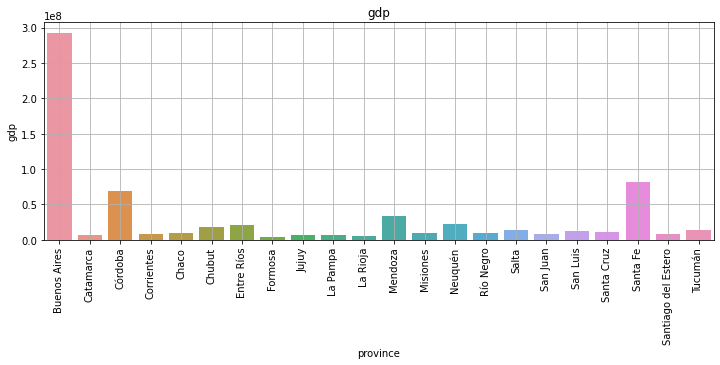

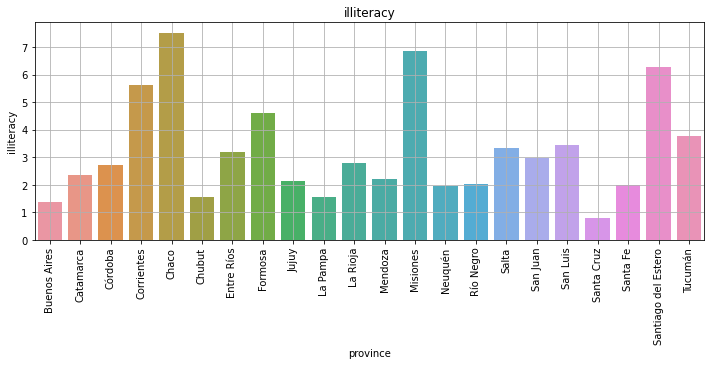

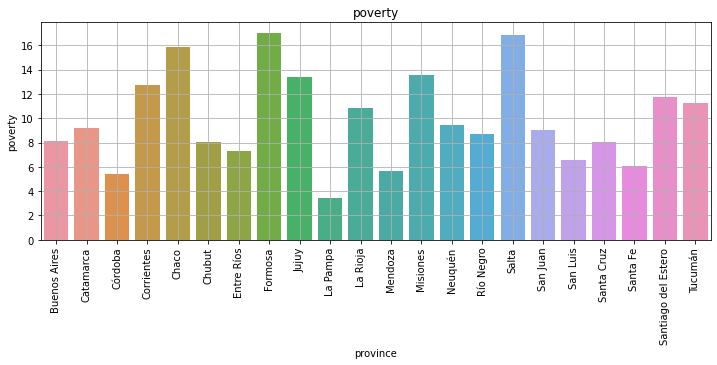

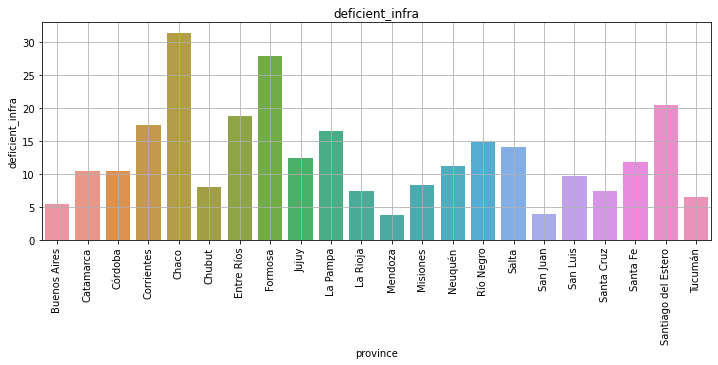

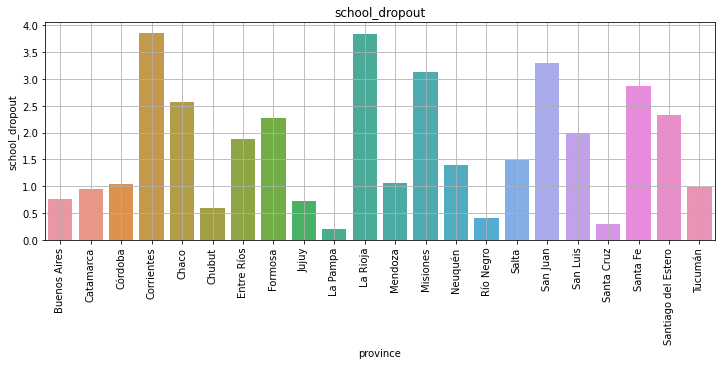

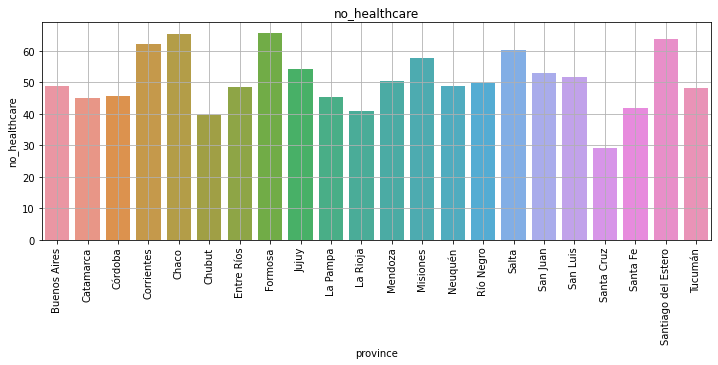

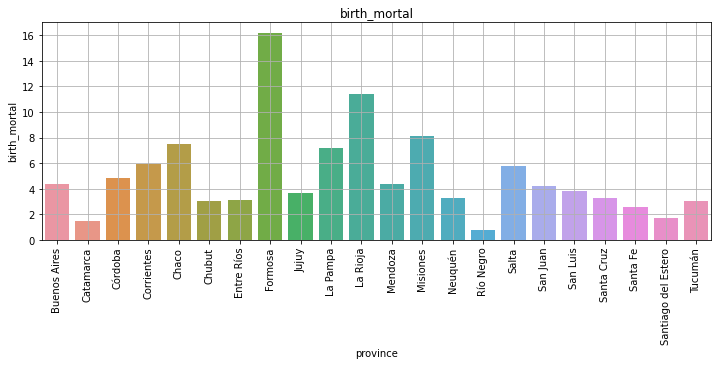

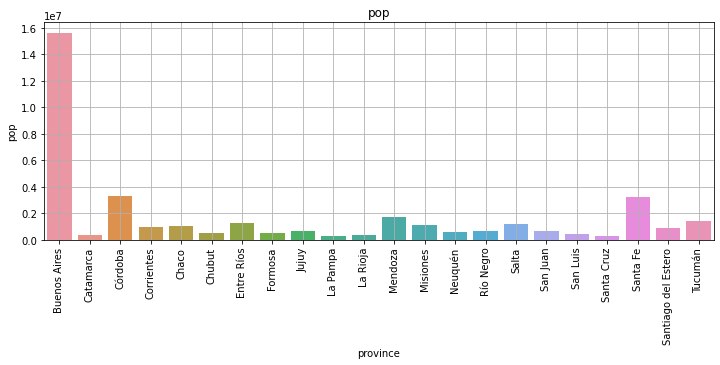

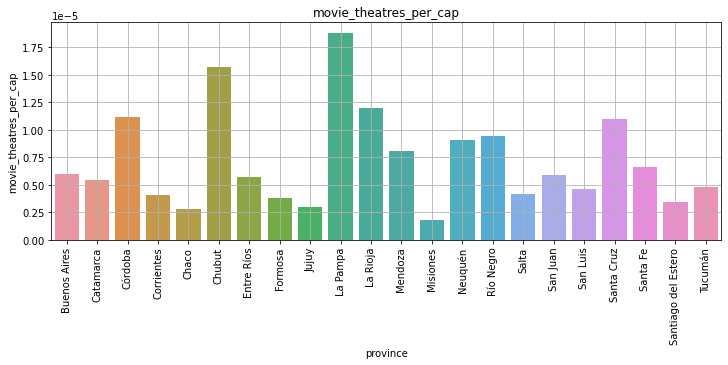

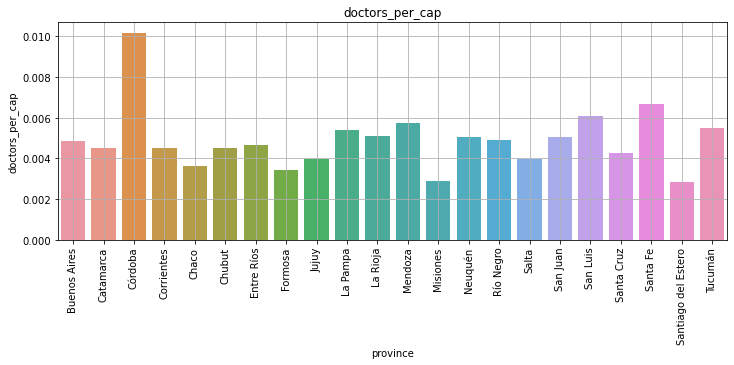

In [10]:
for f in features:
    fig = plt.figure(figsize = (12,4))
    sns.barplot(x=data['province'], y=f, data=x)
    plt.xticks(rotation=90) 
    plt.grid()
    plt.title(f)
    plt.show()

## gdp_per_cap

In [11]:
GDP = data['gdp']
POP = data['pop']

In [12]:
gdp_per_cap = GDP/POP
x['gdp_per_cap'] = gdp_per_cap
x.drop(['gdp'], axis=1, inplace= True)
x.head()

,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,gdp_per_cap
0,1.38324,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836,18.732051
1,2.34414,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502,16.722352
2,2.71414,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175,20.962931
3,5.60242,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495,8.027456
4,7.51758,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605,9.317753


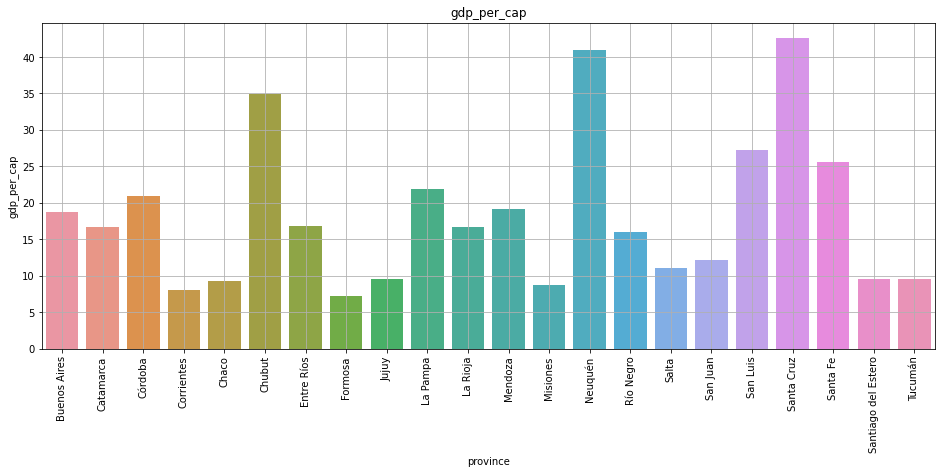

In [13]:
plt.figure(figsize=(16,6))  #always put a "=" after figsize
sns.barplot(x= data['province'], y=x['gdp_per_cap'])
plt.title('gdp_per_cap')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [35]:
tot_pop = x['pop'].sum()
print('Total population : ',tot_pop)

Total population :  37099740


## Standard Scaling 

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(x)



## PCA 

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca= PCA(n_components=10)
x_pca = pca.fit_transform(x_scaled)


## New dataframe with PCs

In [17]:
data_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2' , 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
data_pca['province'] = data['province']
data_pca.head()
    


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,province
0,-1.516472,3.600709,0.403410,2.481069,-0.738673,-0.743640,0.346060,0.026936,-0.000222,0.051523,Buenos Aires
1,-0.744121,0.314117,-1.100099,-0.558946,-0.012326,0.472960,-0.005873,-0.430678,-0.196263,-0.311489,Catamarca
2,-2.484150,0.354872,2.070790,0.006506,2.077928,0.455931,-0.819811,0.458128,-0.466495,0.120530,Córdoba
3,2.805234,0.140259,0.807748,-0.824886,0.138521,-0.413054,0.293692,-0.143802,0.052075,0.462016,Corrientes
4,4.294031,-0.588629,-0.326261,0.486874,1.095996,-1.021951,-0.139026,0.176263,-0.560397,0.000957,Chaco


### To check for the variance of PCs 

In [18]:
x_pca1 = data_pca.drop(['province'], axis= 1)

In [19]:
x_pca1.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], dtype='object')

In [20]:
pc_list= list(x_pca1.columns)

In [21]:
pc_list

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [22]:
def variance(data):
    n = len(data)
    mean = sum(data)/n
    deviations = [( x - mean)**2 for x in data]
    variance = sum(deviations)/n
    return variance
    

In [23]:
variance_list = []
for pc in pc_list:
    vari = variance(data_pca[pc])  # dont put data_pca['pc'] because it will become a string and a keyerror pops up
    variance_list.append(vari)

In [24]:
variance_list

[4.887655157544198,
 1.2344232867861988,
 1.0215869214729445,
 0.8765281106446405,
 0.741225417979604,
 0.451083825724721,
 0.3288447518506106,
 0.1844691856217744,
 0.14535044508947226,
 0.12883289728584055]

## Variance of  Principle Components

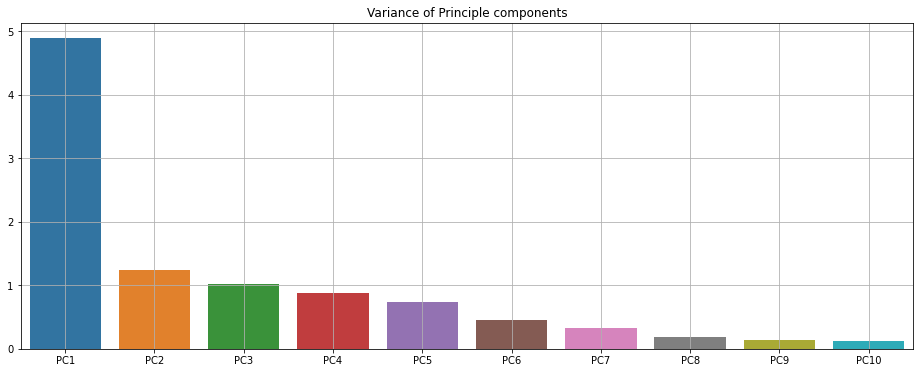

In [25]:
fig = plt.figure(figsize = (16,6))
sns.barplot(x=pc_list, y=variance_list)
#plt.xticks(rotation=90) 
plt.grid()
plt.title("Variance of Principle components")
plt.show()

In [26]:
from sklearn.cluster import KMeans

C:\Users\Abhishek Joshi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


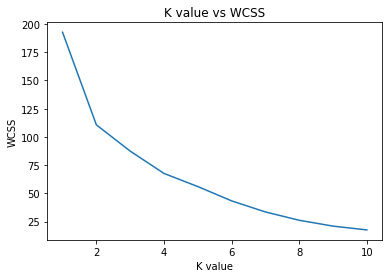

In [54]:
wcss=[]
for i in range(1,11):
    model = KMeans(n_clusters= i, random_state=0)
    model.fit(data_pca.iloc[:,0:5])
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.title('K value vs WCSS')
plt.show()
    

In [55]:
model = KMeans(n_clusters=4,random_state=0)
#model.fit(X)
y_pred = model.fit_predict(data_pca.iloc[:, 0:5])
print(y_pred)

[0 2 2 1 1 3 2 1 2 3 2 2 1 3 2 1 2 2 3 2 1 2]


In [56]:
dn = data_pca.iloc[:,0:5]
dn['province']= data_pca['province']
dn['cluster'] = model.labels_.astype('object')

In [57]:
for c in range(4):
    print('Cluster ' + str(c) + ':')
    print(dn[dn.cluster==c].province.value_counts().index.tolist())
    print()

Cluster 0:
['Buenos Aires']

Cluster 1:
['Salta', 'Misiones', 'Chaco', 'Corrientes', 'Formosa', 'Santiago del Estero']

Cluster 2:
['San Luis', 'La Rioja', 'Entre Ríos', 'Santa Fe', 'Río Negro', 'Tucumán', 'Jujuy', 'San Juan', 'Catamarca', 'Córdoba', 'Mendoza']

Cluster 3:
['La Pampa', 'Santa Cruz', 'Neuquén', 'Chubut']



## K-Means Clustering using all the originl features in the dataset (For comparaison). 

C:\Users\Abhishek Joshi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


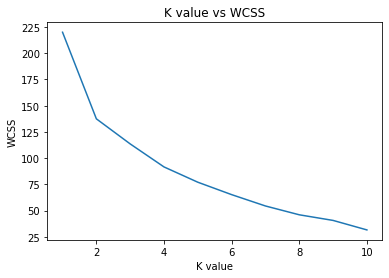

In [45]:
wcss=[]
for i in range(1,11):
    model = KMeans(n_clusters= i, random_state=0)
    model.fit(x_scaled)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.title('K value vs WCSS')
plt.show()

In [51]:
model = KMeans(n_clusters=4,random_state=0)
#model.fit(X)
y_pred = model.fit_predict(x_scaled)
print(y_pred)

[2 0 0 1 1 3 0 1 0 3 0 0 1 3 0 1 0 0 3 0 1 0]


In [52]:
x['province']= data_pca['province']
x['cluster'] = model.labels_.astype('object')

In [53]:
for c in range(4):
    print('Cluster ' + str(c) + ':')
    print(x[x.cluster==c].province.value_counts().index.tolist())
    print()

Cluster 0:
['San Luis', 'La Rioja', 'Entre Ríos', 'Santa Fe', 'Río Negro', 'Tucumán', 'Jujuy', 'San Juan', 'Catamarca', 'Córdoba', 'Mendoza']

Cluster 1:
['Salta', 'Misiones', 'Chaco', 'Corrientes', 'Formosa', 'Santiago del Estero']

Cluster 2:
['Buenos Aires']

Cluster 3:
['La Pampa', 'Santa Cruz', 'Neuquén', 'Chubut']



The clustering by K-means of 5 Principle components provide the same segregation given by K-Means clustering of all the features in the raw dataset

### Buenos Aires stands out from other provinces

In [63]:
mean_features = ['illiteracy', 'poverty', 'deficient_infra', 'school_dropout',
                 'no_healthcare', 'birth_mortal', 'movie_theatres_per_cap',
                 'doctors_per_cap', 'gdp_per_cap']

cluster_stats_mean = x.groupby(['cluster'])[mean_features].mean()
cluster_stats_mean

,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,movie_theatres_per_cap,doctors_per_cap,gdp_per_cap
cluster,,,,,,,,,
0,2.685755,8.496304,10.021547,1.732751,48.160627,3.936364,0.000007,0.005668,17.331259
1,5.702128,14.634113,19.987141,2.607909,62.558983,7.533333,0.000003,0.003539,8.991031
2,1.383240,8.167798,5.511856,0.766168,48.794700,4.400000,0.000006,0.004836,18.732051
3,1.455649,7.232981,10.807244,0.618292,40.749725,4.200000,0.000014,0.004812,35.070628


In [67]:
# use groupby to calc sum for each cluster
data['cluster'] = x['cluster']
cluster_stats_sum = data.groupby(['cluster'])[['gdp','pop']].sum()
cluster_stats_sum

,gdp,pop
cluster,,
0,2.675176e+08,14053311
1,5.308123e+07,5768056
2,2.926899e+08,15625084
3,5.896596e+07,1653289


## Some interpretation of the clusters:



### Cluster 0: Rich provinces 


### Cluster 1: Poor provinces with bad health care and poor infrastructure

### Cluster 2: Buenos Aires - Province around the capital and by far largest city (Best infrastructure)

### Cluster 3: Richest provinces (high GDP per capita) with low population, very low illiteracy and school dropout.                         High healthcare quality and "cultural value" (measured by movies/theatres per capita)